In [67]:
import numpy as np

class Car:
    def __init__(self, max_speed, max_turn_rate):
        self.position = np.array([0.0, 0.0])
        self.speed = 0.0
        self.angle = 0.0
        self.max_speed = max_speed
        self.max_turn_rate = max_turn_rate

    def accelerate(self, rate):
        self.speed = min(self.speed + rate, self.max_speed)

    def deaccelerate(self, rate):
        self.speed = max(self.speed - rate, 0.0)

    def turn_right(self, rate):
        self.angle -= min(rate, self.max_turn_rate)

    def turn_left(self, rate):
        self.angle += min(rate, self.max_turn_rate)

    def move(self):
        self.position[0] += self.speed * np.cos(self.angle)
        self.position[1] += self.speed * np.sin(self.angle)


class PIDController:
    def __init__(self, P, I, D):
        self.P = P
        self.I = I
        self.D = D
        self.previous_error = 0.0
        self.integral = 0.0

    def get_control_signal(self, error, dt):
        self.integral += error * dt
        derivative = (error - self.previous_error) / dt
        self.previous_error = error
        return self.P * error + self.I * self.integral + self.D * derivative

max_speed = 10.0
max_turn_rate = np.pi / 12
P, I, D = 0.1, 0.5, 0.1

car = Car(max_speed, max_turn_rate)
controller = PIDController(P, I, D)

path = np.array([[1, 1], [4, 10], [1, 17], [5, 12], [9, 17]])  # some 2D path
current_target_index = 0

last_error = np.inf

trajectory = []

iter = 0
while current_target_index < len(path) and iter < 100:
    error = np.linalg.norm(path[current_target_index] - car.position)

    if error < 0.1 or (last_error < error and error < 2.0):
        current_target_index += 1
        last_error = np.inf
        continue
    
    last_error = error

    control_signal = controller.get_control_signal(error, 1.0)

    if control_signal > 0:
        car.accelerate(control_signal)
    elif control_signal < 0:
        car.deaccelerate(-control_signal)

    angle_to_target = np.arctan2(path[current_target_index][1] - car.position[1],
                                 path[current_target_index][0] - car.position[0])

    angle_error = angle_to_target - car.angle

    if angle_error > 0:
        car.turn_left(angle_error)
    else:
        car.turn_right(-angle_error)

    car.move()
    trajectory.append(car.position.copy())
    iter += 1

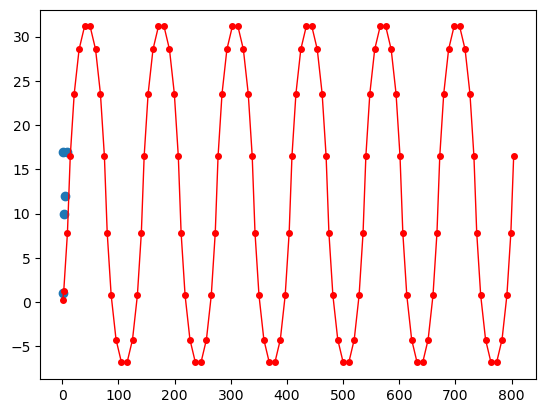

In [68]:
# Plot target points and car trajectory
import matplotlib.pyplot as plt
plt.plot(path[:, 0], path[:, 1], 'o')
plt.plot(np.array(trajectory)[:, 0], np.array(trajectory)[:, 1], 'r-', linewidth=1)
plt.plot(np.array(trajectory)[:, 0], np.array(trajectory)[:, 1], 'ro', markersize=4)
plt.show()